<a href="https://colab.research.google.com/github/John260260/Classification_problms_ML/blob/main/Churn_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score,fbeta_score,precision_recall_curve
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [136]:
#import data
df=pd.read_csv('/content/drive/MyDrive/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [137]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [138]:
df.shape

(7043, 21)

In [139]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [141]:
Counter(df['gender'])

Counter({'Female': 3488, 'Male': 3555})

In [142]:
Counter(df['SeniorCitizen'])

Counter({0: 5901, 1: 1142})

In [143]:
Counter(df['Partner'])

Counter({'No': 3641, 'Yes': 3402})

In [144]:
Counter(df['Dependents'])

Counter({'No': 4933, 'Yes': 2110})

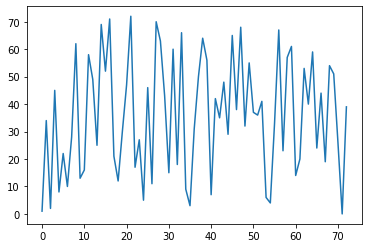

In [145]:
plt.plot(df['tenure'].unique())

In [146]:
len(df['tenure'].unique())

73

In [147]:
Counter(df['PhoneService'])

Counter({'No': 682, 'Yes': 6361})

In [148]:
Counter(df['MultipleLines'])

Counter({'No': 3390, 'No phone service': 682, 'Yes': 2971})

In [149]:
Counter(df['InternetService'])

Counter({'DSL': 2421, 'Fiber optic': 3096, 'No': 1526})

In [150]:
Counter(df['OnlineSecurity'])

Counter({'No': 3498, 'No internet service': 1526, 'Yes': 2019})

In [151]:
Counter(df['OnlineBackup'])

Counter({'No': 3088, 'No internet service': 1526, 'Yes': 2429})

In [152]:
Counter(df['DeviceProtection'])

Counter({'No': 3095, 'No internet service': 1526, 'Yes': 2422})

In [153]:
Counter(df['TechSupport'])

Counter({'No': 3473, 'No internet service': 1526, 'Yes': 2044})

In [154]:
Counter(df['StreamingTV'])

Counter({'No': 2810, 'No internet service': 1526, 'Yes': 2707})

In [155]:
Counter(df['Contract'])

Counter({'Month-to-month': 3875, 'One year': 1473, 'Two year': 1695})

In [156]:
Counter(df['PaperlessBilling'])

Counter({'No': 2872, 'Yes': 4171})

In [157]:
Counter(df['PaymentMethod'])

Counter({'Bank transfer (automatic)': 1544,
         'Credit card (automatic)': 1522,
         'Electronic check': 2365,
         'Mailed check': 1612})

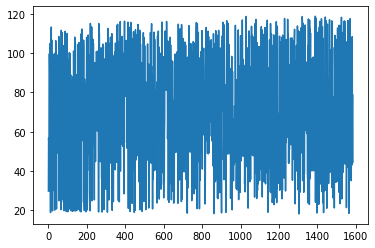

In [158]:
plt.plot(df['MonthlyCharges'].unique())

In [159]:
Counter(df['Churn'])

Counter({'No': 5174, 'Yes': 1869})

In [160]:
df.drop('customerID',axis=1,inplace=True)

In [161]:
df2= pd.get_dummies(df,columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                               'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                               'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'], prefix_sep='_', drop_first=True)

In [162]:
df2.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [163]:
df2['Churn'] = df2['Churn'].map({'Yes':1 ,'No':0})

In [164]:
df2['Churn']=df2.Churn.astype('category')

In [165]:
len(df2.columns)

31

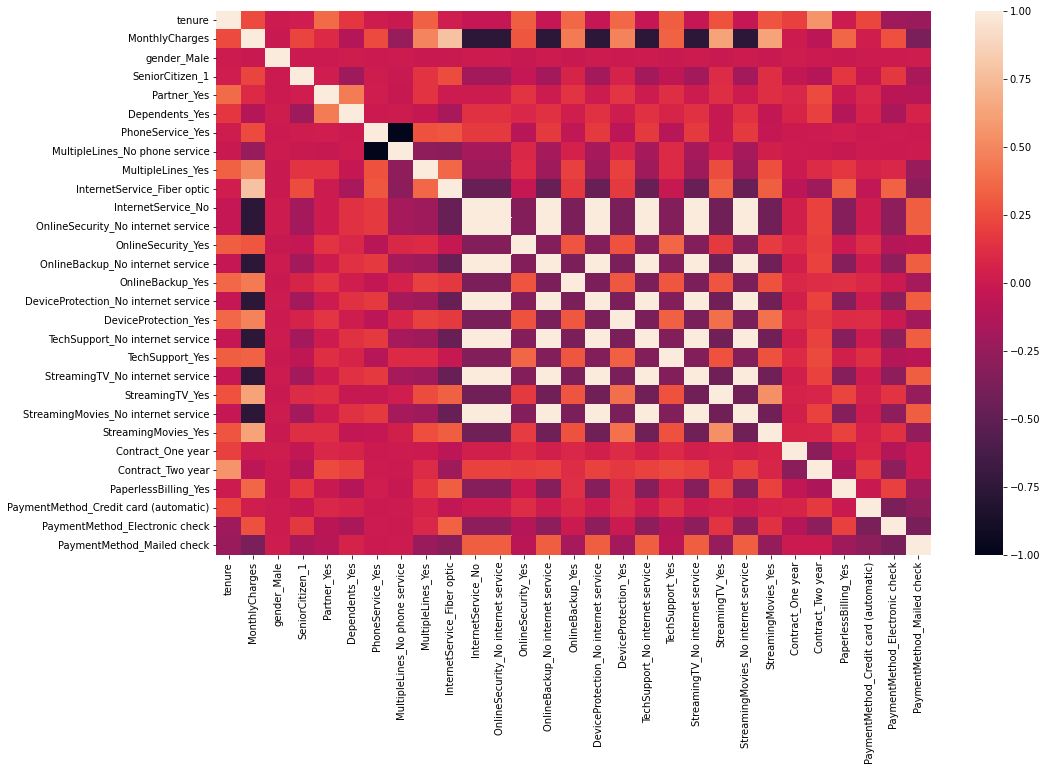

In [166]:
plt.figure(figsize=(16,10))
sns.heatmap(df2.corr())

In [167]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   tenure                                 7043 non-null   int64   
 1   MonthlyCharges                         7043 non-null   float64 
 2   TotalCharges                           7043 non-null   object  
 3   Churn                                  7043 non-null   category
 4   gender_Male                            7043 non-null   uint8   
 5   SeniorCitizen_1                        7043 non-null   uint8   
 6   Partner_Yes                            7043 non-null   uint8   
 7   Dependents_Yes                         7043 non-null   uint8   
 8   PhoneService_Yes                       7043 non-null   uint8   
 9   MultipleLines_No phone service         7043 non-null   uint8   
 10  MultipleLines_Yes                      7043 non-null   uint8

In [168]:
#df2['TotalCharges']=df2.TotalCharges.astype('float')
#df2['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [169]:
len(df2.loc[df['TotalCharges']==" "])
#only 11 rows with total charges with nulll value

11

In [170]:
df2.loc[df['TotalCharges']==" "]

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,0,52.55,,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0
753,0,20.25,,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
936,0,80.85,,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1
1082,0,25.75,,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
1340,0,56.05,,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
3331,0,19.85,,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
3826,0,25.35,,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
4380,0,20.00,,0,0,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
5218,0,19.70,,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
6670,0,73.35,,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1


In [171]:
#we see that peopel with empty total charges have just signed up because of their tenure month is 0. These people alse have churn value =0.
#so we can set total charges to 0

df2.loc[(df['TotalCharges']== ' '), 'TotalCharges']=0

In [172]:
df2.loc[df['tenure']==0]

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,0,52.55,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0
753,0,20.25,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
936,0,80.85,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1
1082,0,25.75,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
1340,0,56.05,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
3331,0,19.85,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
3826,0,25.35,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
4380,0,20.00,0,0,0,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
5218,0,19.70,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
6670,0,73.35,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1


In [173]:
df2['TotalCharges']=pd.to_numeric(df2['TotalCharges'])

In [174]:
df2.columns=df2.columns.str.replace(')',' ')
df2.columns=df2.columns.str.replace('(',' ')
df2.columns=df2.columns.str.replace(' ','_')
df2.columns=df2.columns.str.replace('__','_')

In [175]:
df2.replace(' ','_', regex=True,inplace=True) ## if to clear the white space in the values

In [176]:
df2.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No_phone_service,MultipleLines_Yes,InternetService_Fiber_optic,InternetService_No,OnlineSecurity_No_internet_service,OnlineSecurity_Yes,OnlineBackup_No_internet_service,OnlineBackup_Yes,DeviceProtection_No_internet_service,DeviceProtection_Yes,TechSupport_No_internet_service,TechSupport_Yes,StreamingTV_No_internet_service,StreamingTV_Yes,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_One_year,Contract_Two_year,PaperlessBilling_Yes,PaymentMethod_Credit_card_automatic_,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,1,29.85,29.85,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [177]:
scale=StandardScaler()

In [178]:
x_scaled=scale.fit_transform(df2[['MonthlyCharges','TotalCharges','tenure']])

In [179]:
X_scaled=pd.DataFrame(x_scaled, columns=('MonthlyCharges','TotalCharges','tenure'))

In [180]:
df3=df2.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1).copy()

In [181]:
df_scaled=pd.concat([df3,X_scaled], axis=1)

In [182]:
X=df_scaled.drop('Churn',axis=1).copy()
y=df_scaled['Churn'].copy()

In [183]:
sum(y)/len(y)

0.2653698707936959

In [184]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,stratify=y)

In [185]:
sum(y_train)/len(y_train)

0.2654297614539947

In [186]:
sum(y_test)/len(y_test)

0.26519023282226006

stratify worked as expected both y_train,y_test have same percentage of people that left the company.

## Logistic Regression

In [187]:
logistic_reg=LogisticRegression(random_state=26)

In [188]:
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=26)

In [189]:
predictions=logistic_reg.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1294
           1       0.66      0.55      0.60       467

    accuracy                           0.81      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761



In [190]:
confusion_matrix(y_test,predictions)

array([[1161,  133],
       [ 208,  259]])

In [191]:
param_grid=[
            {'C':[0.1,0.01,0.001,0.5,1,10,100,1000],
             'penalty':['l1', 'l2', 'elasticnet', 'none'],
             'class_weight' : ['dict','balanced','none'],
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             }
]

optimal_params= GridSearchCV( LogisticRegression(), param_grid, cv=5, scoring='accuracy',verbose=0, n_jobs=-1)

optimal_params.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1240 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.01, 0.001, 0.5, 1, 10, 100, 1000],
                          'class_weight': ['dict', 'balanced', 'none'],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             scoring='accuracy')

In [192]:
print(optimal_params.best_params_)

{'C': 0.1, 'class_weight': 'dict', 'penalty': 'l2', 'solver': 'newton-cg'}


In [193]:
model=LogisticRegression(C=1,class_weight=dict,penalty='l2',solver='lbfgs')
model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=<class 'dict'>)

In [194]:
y_train_predict= model.predict(X_train)
y_test_predict=model.predict(X_test)
print('Train Data')
print(metrics.classification_report(y_train,y_train_predict))
print('Test Data')
print(metrics.classification_report(y_test,y_test_predict))

Train Data
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3880
           1       0.66      0.55      0.60      1402

    accuracy                           0.81      5282
   macro avg       0.76      0.73      0.74      5282
weighted avg       0.80      0.81      0.80      5282

Test Data
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1294
           1       0.66      0.55      0.60       467

    accuracy                           0.81      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761



In [195]:
confusion_matrix(y_test,y_test_predict)

array([[1161,  133],
       [ 208,  259]])

In [196]:
y_train_proba=model.predict_proba(X_train)
y_test_proba=model.predict_proba(X_test)

In [197]:
y_train_proba, y_test_proba

(array([[0.98974944, 0.01025056],
        [0.57634408, 0.42365592],
        [0.98892595, 0.01107405],
        ...,
        [0.92290624, 0.07709376],
        [0.96560078, 0.03439922],
        [0.8438746 , 0.1561254 ]]), array([[0.83373379, 0.16626621],
        [0.94922943, 0.05077057],
        [0.94554086, 0.05445914],
        ...,
        [0.81919542, 0.18080458],
        [0.60153798, 0.39846202],
        [0.53022829, 0.46977171]]))

In [198]:
def proba_class(y_proba,threshold):
  predicted_class=[1 if a[1]>threshold else 0 for a in y_proba]
  return np.array(predicted_class)

In [199]:
proba_class(y_train_proba,0.5)==y_train_predict

array([ True,  True,  True, ...,  True,  True,  True])

In [200]:
#from from_estimator import ConfusionMatrixDisplay

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


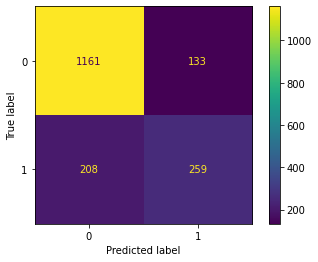

In [201]:
plot_confusion_matrix(model,X_test,y_test)
plt.show()

In [202]:
def classification_metrics(y_actual,y_pred):
  precision=precision_score(y_actual,y_pred)
  recall=recall_score(y_actual,y_pred)
  fb=fbeta_score(y_actual,y_pred, beta=1)
  print('precision:{}, recall: {}, f1_Score: {}'. format(round(precision,2),round(recall,2),round(fb,2)))

In [203]:
classification_metrics(y_train,y_train_predict)
classification_metrics(y_test,y_test_predict)

precision:0.66, recall: 0.55, f1_Score: 0.6
precision:0.66, recall: 0.55, f1_Score: 0.6


In [204]:
for threshold in range (10,100, 10):
  trsh=threshold/100
  y_pred_train=proba_class(y_train_proba, trsh)
  print('Threshold: {}'. format(trsh))
  classification_metrics(y_train,y_pred_train)

Threshold: 0.1
precision:0.4, recall: 0.95, f1_Score: 0.56
Threshold: 0.2
precision:0.47, recall: 0.86, f1_Score: 0.61
Threshold: 0.3
precision:0.54, recall: 0.77, f1_Score: 0.64
Threshold: 0.4
precision:0.6, recall: 0.66, f1_Score: 0.63
Threshold: 0.5
precision:0.66, recall: 0.55, f1_Score: 0.6
Threshold: 0.6
precision:0.72, recall: 0.4, f1_Score: 0.51
Threshold: 0.7
precision:0.8, recall: 0.21, f1_Score: 0.33
Threshold: 0.8
precision:0.97, recall: 0.03, f1_Score: 0.05
Threshold: 0.9
precision:0.0, recall: 0.0, f1_Score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [205]:
def classification_metrics(y_actual,y_pred):
  precision=precision_score(y_actual,y_pred)
  recall=recall_score(y_actual,y_pred)
  fb=fbeta_score(y_actual,y_pred, beta=1)
  print('precision:{}, recall: {}, f1_Score: {}'. format(round(precision,2),round(recall,2),round(fb,2)))
  return(precision,recall,fb)

In [206]:
thresholds_curve=[]
prec=[]
recall=[]
fb=[]
for threshold in range(10,100,10):
  trsh=threshold/100
  y_pred_train=proba_class(y_train_proba, trsh)
  print('Threshold:{}'.format(trsh))
  p,r,f= classification_metrics(y_train, y_pred_train)
  thresholds_curve.append(trsh)
  prec.append(p)
  recall.append(r)
  fb.append(f)


Threshold:0.1
precision:0.4, recall: 0.95, f1_Score: 0.56
Threshold:0.2
precision:0.47, recall: 0.86, f1_Score: 0.61
Threshold:0.3
precision:0.54, recall: 0.77, f1_Score: 0.64
Threshold:0.4
precision:0.6, recall: 0.66, f1_Score: 0.63
Threshold:0.5
precision:0.66, recall: 0.55, f1_Score: 0.6
Threshold:0.6
precision:0.72, recall: 0.4, f1_Score: 0.51
Threshold:0.7
precision:0.8, recall: 0.21, f1_Score: 0.33
Threshold:0.8
precision:0.97, recall: 0.03, f1_Score: 0.05
Threshold:0.9
precision:0.0, recall: 0.0, f1_Score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


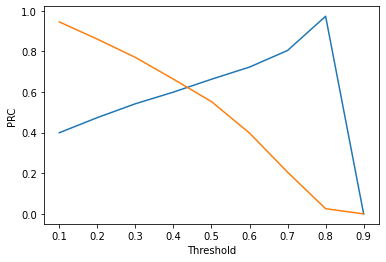

In [207]:
sns.lineplot(x= thresholds_curve, y= prec)
sns.lineplot(x= thresholds_curve, y= recall)
plt.xlabel('Threshold')
plt.ylabel('PRC')
plt.show()

In [208]:
y_pred_train= proba_class(y_train_proba,0.45)
confusion_matrix(y_train,y_pred_train)

array([[3379,  501],
       [ 551,  851]])

In [209]:
y_pred_train= proba_class(y_train_proba,0.50)
confusion_matrix(y_train,y_pred_train)

array([[3486,  394],
       [ 627,  775]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


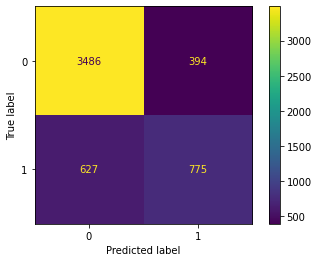

In [210]:
plot_confusion_matrix(model,X_train,y_train)
plt.show()

In [211]:
for threshold in range (10,100,10):
  trsh=threshold/100
  y_pred_test=proba_class(y_test_proba,trsh)
  print('Threshold:{}'.format(trsh))
  classification_metrics(y_test, y_pred_test) 

Threshold:0.1
precision:0.41, recall: 0.95, f1_Score: 0.57
Threshold:0.2
precision:0.48, recall: 0.86, f1_Score: 0.61
Threshold:0.3
precision:0.53, recall: 0.76, f1_Score: 0.63
Threshold:0.4
precision:0.59, recall: 0.68, f1_Score: 0.63
Threshold:0.5
precision:0.66, recall: 0.55, f1_Score: 0.6
Threshold:0.6
precision:0.7, recall: 0.38, f1_Score: 0.5
Threshold:0.7
precision:0.75, recall: 0.2, f1_Score: 0.32
Threshold:0.8
precision:0.77, recall: 0.02, f1_Score: 0.04
Threshold:0.9
precision:0.0, recall: 0.0, f1_Score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [212]:
thresholds_curve_test=[]
prec_test=[]
recall_test=[]
fb_test=[]
for threshold in range (10,100,10):
  trsh=threshold/100
  y_pred_test=proba_class(y_test_proba,trsh)
  print('Threshold:{}'.format(trsh))
  p,r,f=classification_metrics(y_test, y_pred_test)
  thresholds_curve_test.append(trsh)
  prec_test.append(p)
  recall_test.append(r)
  fb_test.append(f)

Threshold:0.1
precision:0.41, recall: 0.95, f1_Score: 0.57
Threshold:0.2
precision:0.48, recall: 0.86, f1_Score: 0.61
Threshold:0.3
precision:0.53, recall: 0.76, f1_Score: 0.63
Threshold:0.4
precision:0.59, recall: 0.68, f1_Score: 0.63
Threshold:0.5
precision:0.66, recall: 0.55, f1_Score: 0.6
Threshold:0.6
precision:0.7, recall: 0.38, f1_Score: 0.5
Threshold:0.7
precision:0.75, recall: 0.2, f1_Score: 0.32
Threshold:0.8
precision:0.77, recall: 0.02, f1_Score: 0.04
Threshold:0.9
precision:0.0, recall: 0.0, f1_Score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


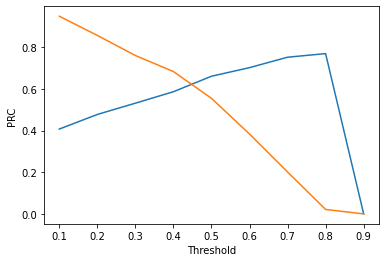

In [213]:
sns.lineplot(x= thresholds_curve_test, y= prec_test)
sns.lineplot(x= thresholds_curve_test, y= recall_test)
plt.xlabel('Threshold')
plt.ylabel('PRC')
plt.show()

## Decison Tree

In [214]:
from sklearn.tree import DecisionTreeClassifier

In [215]:
clf= DecisionTreeClassifier(random_state=26)
clf.fit(X_train,y_train)
y_train_predict=clf.predict(X_train)
y_test_predict=clf.predict(X_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3880
           1       1.00      0.99      1.00      1402

    accuracy                           1.00      5282
   macro avg       1.00      1.00      1.00      5282
weighted avg       1.00      1.00      1.00      5282

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1294
           1       0.51      0.52      0.51       467

    accuracy                           0.74      1761
   macro avg       0.67      0.67      0.67      1761
weighted avg       0.74      0.74      0.74      1761



In [216]:
param_grids = {
    'max_depth':np.arange(2,10),
    'class_weight':[None,'balanced'],
    'ccp_alpha':[0.1,0.01,0.001,0.0001,1,2,5,10],
    'criterion':['gini','entropy']
}

In [217]:
clf = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grids, cv= 5,scoring='f1_macro',n_jobs = -1)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 0.0001, 1, 2, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='f1_macro')

In [218]:
print(clf.best_params_)

{'ccp_alpha': 0.001, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 6}


In [219]:
clf= DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='entropy', max_depth=6,random_state=26)
clf.fit(X_train,y_train)
y_train_predict=clf.predict(X_train)
y_test_predict=clf.predict(X_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3880
           1       0.63      0.61      0.62      1402

    accuracy                           0.80      5282
   macro avg       0.75      0.74      0.74      5282
weighted avg       0.80      0.80      0.80      5282

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1294
           1       0.61      0.60      0.60       467

    accuracy                           0.79      1761
   macro avg       0.73      0.73      0.73      1761
weighted avg       0.79      0.79      0.79      1761



## Random Forest

In [220]:
rndf= RandomForestClassifier(random_state=26)
rndf.fit(X_train,y_train)
y_train_predict=rndf.predict(X_train)
y_test_predict=rndf.predict(X_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3880
           1       1.00      0.99      1.00      1402

    accuracy                           1.00      5282
   macro avg       1.00      1.00      1.00      5282
weighted avg       1.00      1.00      1.00      5282

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1294
           1       0.64      0.49      0.55       467

    accuracy                           0.79      1761
   macro avg       0.74      0.69      0.71      1761
weighted avg       0.78      0.79      0.78      1761



In [221]:
params= {'n_estimators': [50,100,110],
         'max_depth': [15,25,40,50],
         'class_weight': [None,'balanced'],
         'ccp_alpha':[0.1,0.01,0.001,0.0001,1,2,5,10],
         'criterion':['gini','entropy']}

In [222]:
grid_model= GridSearchCV(RandomForestClassifier(),param_grid =params,scoring='f1_macro',cv=5,verbose=0,n_jobs=-1)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 0.0001, 1, 2, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 25, 40, 50],
                         'n_estimators': [50, 100, 110]},
             scoring='f1_macro')

In [223]:
print(grid_model.best_params_)

{'ccp_alpha': 0.001, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 110}


In [224]:
rndf= RandomForestClassifier(ccp_alpha=0.001, class_weight='balanced',n_estimators=100,criterion='entropy', max_depth=15,random_state=26)
rndf.fit(X_train,y_train)
y_train_predict=rndf.predict(X_train)
y_test_predict=rndf.predict(X_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      3880
           1       0.66      0.87      0.75      1402

    accuracy                           0.84      5282
   macro avg       0.80      0.85      0.82      5282
weighted avg       0.87      0.84      0.85      5282

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1294
           1       0.56      0.75      0.64       467

    accuracy                           0.78      1761
   macro avg       0.73      0.77      0.74      1761
weighted avg       0.81      0.78      0.79      1761



##XgBoost

In [225]:
boost=xgboost.XGBClassifier(random_state=26)
boost.fit(X_train,y_train)
y_train_predict=rndf.predict(X_train)
y_test_predict=rndf.predict(X_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      3880
           1       0.66      0.87      0.75      1402

    accuracy                           0.84      5282
   macro avg       0.80      0.85      0.82      5282
weighted avg       0.87      0.84      0.85      5282

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1294
           1       0.56      0.75      0.64       467

    accuracy                           0.78      1761
   macro avg       0.73      0.77      0.74      1761
weighted avg       0.81      0.78      0.79      1761



In [226]:
xgb={
    'max_depth': [3,5,7,9], #[3,5]
    'learning_rate':[0.05,0.5,0.6,0.06], #[]
    'n_estimators':[10,20,30,40],
    'scale_pos_weight':[1,2,3,5], #adding penalty to smaller class in imbalanced datas #[0.5,1,3,5,]
    'reg_lambda': [1,2,3,5,10]
}

# if imbalanced data use AUC for evaluation

In [227]:
grid_model1= GridSearchCV(boost,param_grid=xgb,scoring='f1_macro',cv=5,n_jobs=-1)
grid_model1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=26), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.5, 0.6, 0.06],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [10, 20, 30, 40],
                         'reg_lambda': [1, 2, 3, 5, 10],
                         'scale_pos_weight': [1, 2, 3, 5]},
             scoring='f1_macro')

In [228]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [229]:
print(grid_model1.best_params_)

{'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 20, 'reg_lambda': 5, 'scale_pos_weight': 2}


In [230]:
xgb={
    'max_depth': [3,4,5,6,7], #[3,5]
    'learning_rate':[0.6,0.06], #[]
    'n_estimators':[10,20,25,30],
    'scale_pos_weight':[2], #adding penalty to smaller class in imbalanced datas #[0.5,1,3,5,]
    'reg_lambda': [5]
}

In [231]:
grid_model1= GridSearchCV(boost,param_grid=xgb,scoring='f1_macro',cv=5,n_jobs=-1)
grid_model1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=26), n_jobs=-1,
             param_grid={'learning_rate': [0.6, 0.06],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [10, 20, 25, 30], 'reg_lambda': [5],
                         'scale_pos_weight': [2]},
             scoring='f1_macro')

In [232]:
print(grid_model1.best_params_)

{'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 20, 'reg_lambda': 5, 'scale_pos_weight': 2}


In [233]:
boost=xgboost.XGBClassifier(max_depth=3 ,learning_rate= 0.6, n_estimators=20,scale_pos_weight=2, reg_lambda=5,n_jobs=-1,random_state=26)
boost.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='aucpr', eval_set=[(X_test,y_test)])
y_train_predict=rndf.predict(X_train)
y_test_predict=rndf.predict(X_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

[0]	validation_0-aucpr:0.501402
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.584127
[2]	validation_0-aucpr:0.589334
[3]	validation_0-aucpr:0.628297
[4]	validation_0-aucpr:0.635177
[5]	validation_0-aucpr:0.638341
[6]	validation_0-aucpr:0.639886
[7]	validation_0-aucpr:0.640604
[8]	validation_0-aucpr:0.645173
[9]	validation_0-aucpr:0.643359
[10]	validation_0-aucpr:0.643775
[11]	validation_0-aucpr:0.640791
[12]	validation_0-aucpr:0.640363
[13]	validation_0-aucpr:0.638326
[14]	validation_0-aucpr:0.636985
[15]	validation_0-aucpr:0.636619
[16]	validation_0-aucpr:0.640795
[17]	validation_0-aucpr:0.636564
[18]	validation_0-aucpr:0.632021
Stopping. Best iteration:
[8]	validation_0-aucpr:0.645173

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      3880
           1       0.66      0.87      0.75      1402

    accuracy                           0.84      5282
   macro avg       0.80      0.85      0

In [234]:
boost=xgboost.XGBClassifier(max_depth=3 ,learning_rate= 0.6, n_estimators=20,scale_pos_weight=2, reg_lambda=5,n_jobs=-1,random_state=26)
boost.fit(X_train,y_train)
y_train_predict=rndf.predict(X_train)
y_test_predict=rndf.predict(X_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      3880
           1       0.66      0.87      0.75      1402

    accuracy                           0.84      5282
   macro avg       0.80      0.85      0.82      5282
weighted avg       0.87      0.84      0.85      5282

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1294
           1       0.56      0.75      0.64       467

    accuracy                           0.78      1761
   macro avg       0.73      0.77      0.74      1761
weighted avg       0.81      0.78      0.79      1761



In [235]:
############## XgBoost ###########

In [236]:
clf_xgb=xgboost.XGBClassifier(seed=26, objective='binary:logistic', gamma=0.25, learning_rate=0.1, max_depth=4, reg_lambda=10,
                          scale_pos_weight=3, subsample=0.9, colsample_bytree=0.5, n_jobs=-1)

clf_xgb.fit(X_train, y_train, verbose=0, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(X_test,y_test)])

XGBClassifier(colsample_bytree=0.5, gamma=0.25, max_depth=4, n_jobs=-1,
              reg_lambda=10, scale_pos_weight=3, seed=26, subsample=0.9)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


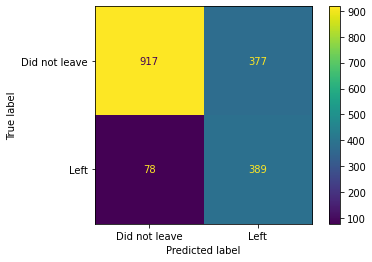

In [237]:
plot_confusion_matrix(clf_xgb,X_test,y_test,values_format='d',display_labels=['Did not leave','Left'])

weight:  {'tenure': 172, 'InternetService_No': 24, 'Contract_One_year': 35, 'PaperlessBilling_Yes': 37, 'TechSupport_Yes': 32, 'InternetService_Fiber_optic': 22, 'PaymentMethod_Electronic_check': 35, 'Partner_Yes': 17, 'DeviceProtection_Yes': 13, 'OnlineSecurity_Yes': 29, 'OnlineBackup_Yes': 29, 'OnlineBackup_No_internet_service': 5, 'MonthlyCharges': 263, 'SeniorCitizen_1': 33, 'MultipleLines_Yes': 36, 'TotalCharges': 323, 'PhoneService_Yes': 14, 'Contract_Two_year': 30, 'StreamingMovies_Yes': 21, 'PaymentMethod_Mailed_check': 13, 'OnlineSecurity_No_internet_service': 6, 'StreamingTV_Yes': 26, 'Dependents_Yes': 29, 'MultipleLines_No_phone_service': 10, 'gender_Male': 32, 'PaymentMethod_Credit_card_automatic_': 18}
gain:  {'tenure': 27.763389931569776, 'InternetService_No': 52.60024414624999, 'Contract_One_year': 30.10863688774286, 'PaperlessBilling_Yes': 10.61262693513513, 'TechSupport_Yes': 19.30604708403125, 'InternetService_Fiber_optic': 131.15705714127273, 'PaymentMethod_Electroni

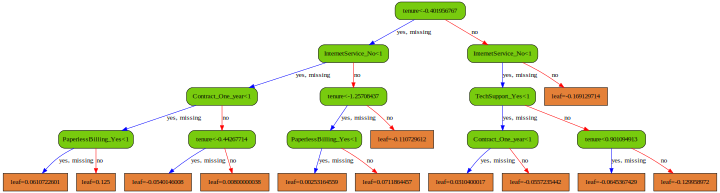

In [238]:
clf_xgb= xgboost.XGBClassifier(seed=26, objective='binary:logistic', gamma=0.25, learning_rate=0.1,max_depth=4,
                               reg_lambda=10, scale_pos_weight=3, subsample=0.9, colsample_bytree=0.5, n_estimator=1)

clf_xgb.fit(X_train,y_train)

bst=clf_xgb.get_booster()
for importance_type in ('weight','gain','cover','total_gain','total_cover'):
  print('%s: ' %importance_type, bst.get_score(importance_type=importance_type))

node_params={'shape':'box',
              'style':'filled,rounded',
              'fillcolor':'#78cbe'}
leaf_params={'shape':'box', 
             'style': 'filled',
             'fillcolor':'#e48038'}

xgboost.to_graphviz(clf_xgb,num_trees=0,size='10,10',
                condition_node_params=node_params,
                leaf_node_params=leaf_params)

## Naive Bayes

In [239]:
model=GaussianNB()
model.fit(X_train,y_train)
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.93      0.59      0.72      3880
           1       0.43      0.88      0.58      1402

    accuracy                           0.66      5282
   macro avg       0.68      0.73      0.65      5282
weighted avg       0.80      0.66      0.68      5282

              precision    recall  f1-score   support

           0       0.93      0.59      0.72      1294
           1       0.43      0.87      0.58       467

    accuracy                           0.66      1761
   macro avg       0.68      0.73      0.65      1761
weighted avg       0.79      0.66      0.68      1761



## Support Vector Machine

In [240]:
clf_svm=SVC(random_state=26)
clf_svm.fit(X_train,y_train)
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.93      0.59      0.72      3880
           1       0.43      0.88      0.58      1402

    accuracy                           0.66      5282
   macro avg       0.68      0.73      0.65      5282
weighted avg       0.80      0.66      0.68      5282

              precision    recall  f1-score   support

           0       0.93      0.59      0.72      1294
           1       0.43      0.87      0.58       467

    accuracy                           0.66      1761
   macro avg       0.68      0.73      0.65      1761
weighted avg       0.79      0.66      0.68      1761



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


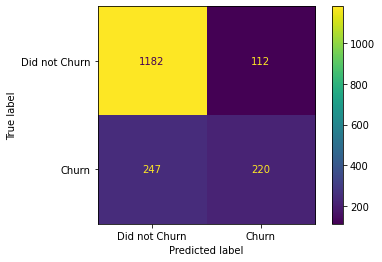

In [241]:
plot_confusion_matrix(clf_svm,X_test,y_test, values_format='d',display_labels=['Did not Churn','Churn'])

In [242]:

param_grid=[
            {'C':[1,100,500,2000,1000],
             'gamma':[0.00001,1,0.01,0.1,0.5],
             'kernel':['rbf']}
]

optimal_params= GridSearchCV( SVC(), param_grid, cv=5, scoring='f1_macro')

optimal_params.fit(X_train,y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [243]:
clf_svm=SVC(random_state=26,C=1000, gamma=0.00001, kernel= 'rbf')
clf_svm.fit(X_train,y_train)
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.93      0.59      0.72      3880
           1       0.43      0.88      0.58      1402

    accuracy                           0.66      5282
   macro avg       0.68      0.73      0.65      5282
weighted avg       0.80      0.66      0.68      5282

              precision    recall  f1-score   support

           0       0.93      0.59      0.72      1294
           1       0.43      0.87      0.58       467

    accuracy                           0.66      1761
   macro avg       0.68      0.73      0.65      1761
weighted avg       0.79      0.66      0.68      1761



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


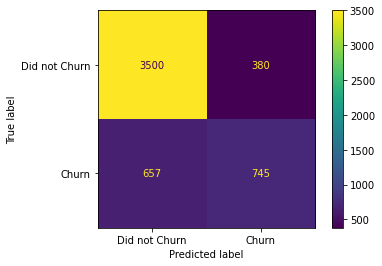

In [244]:
plot_confusion_matrix(clf_svm,X_train,y_train, values_format='d',display_labels=['Did not Churn','Churn'])

In [245]:
from sklearn.decomposition import PCA

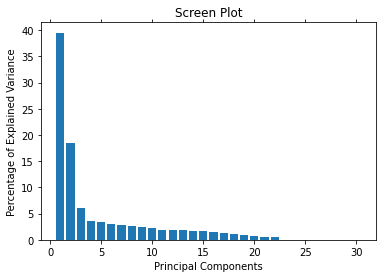

In [246]:
pca=PCA() #PCA centers the data but does not scale it
X_train_pca=pca.fit_transform(X_train)

per_var=np.round(pca.explained_variance_ratio_*100, decimals=1) #Percentage of variance explained by each of the selected components.
labels=[str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params( axis= 'x',which='both',bottom=True, top=True, labelbottom=True)

plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Screen Plot')
plt.show()

In [247]:
#lets do PCA

train_pc1_coords=X_train_pca[:,0]
train_pc2_coords=X_train_pca[:,1]

#now centre and scale the PCs
pca_train_scaled=np.column_stack((train_pc1_coords,train_pc2_coords))

param_grid=[{'C':[1,10,100,1000,2500],
             'gamma':['scale',0.5,0.1,0.001,0.00001,0.0001],
             'kernel':['rbf']}]

optimal_params= GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=0)

optimal_params.fit(pca_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


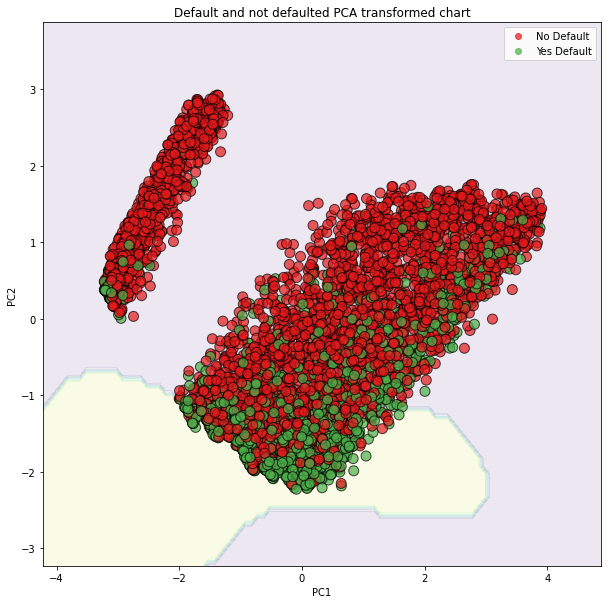

In [248]:
clf_svm=SVC(random_state=42,C=100,gamma='scale',kernel='rbf')
clf_svm.fit(pca_train_scaled, y_train)

##Transform test dataset with PCA...
X_test_pca=pca.transform(X_train)
#X_test_pca=pca.transform(X_test_scaled)

test_pc1_coords=X_test_pca[:,0]
test_pc2_coords=X_test_pca[:,1]

##Now create a matrix of points that we can use to show
##decision regions
##the matrix will be a little bit larger than the 
##transformed PCA points so that we can plot all of 
##the PCA points on it without being on the edge
x_min=test_pc1_coords.min()-1
x_max=test_pc1_coords.max()+1

y_min=test_pc2_coords.min()-1
y_max=test_pc2_coords.max()+1

xx,yy= np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                   np.arange(start=y_min,stop=y_max,step=0.1))

##now we will classify every point in that 
##matrix with the SVM. Points on one sie of the 
##calssification boudary will get 0, and points on the other side will get 1.
Z= clf_svm.predict(np.column_stack((xx.ravel(),yy.ravel())))
## right now , Z is just a long array of lots of 0s and 1s which reflect how each point in mesh was classified.
##We use reshape() so that each classification(0or1) corresponds to a specific point in matrix.
Z=Z.reshape(xx.shape)

fig,ax=plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications.
## The contours will be filled according to the 
## predicted classifications (0s and 1s) in z
ax.contourf (xx,yy,Z,alpha=0.1)

#now create custom colors for the actual data points
cmap=matplotlib.colors.ListedColormap(['#e41a1c','#4daf4a'])
##now draw the actual ata points- these wil
##be colored by their known (not predicted) classifications
##Note: setting alpha=0.7 lets us see if we are covering up a point
##scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test,)
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train, cmap=cmap,s=100,edgecolors='k',alpha=0.7)

##now create legend
legend=ax.legend(scatter.legend_elements()[0], scatter.legend_elements()[1], loc='upper right')

legend.get_texts()[0].set_text('No Default')
legend.get_texts()[1].set_text('Yes Default')

##Now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Default and not defaulted PCA transformed chart')
plt.savefig('svm_default.png')
plt.show()

# KNN

In [249]:
# instantiate the KNN classifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      3880
           1       0.71      0.63      0.67      1402

    accuracy                           0.83      5282
   macro avg       0.79      0.77      0.78      5282
weighted avg       0.83      0.83      0.83      5282

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1294
           1       0.56      0.55      0.56       467

    accuracy                           0.77      1761
   macro avg       0.70      0.70      0.70      1761
weighted avg       0.77      0.77      0.77      1761



In [250]:
param_grid = {
    'n_neighbors':[15,17,19,21,23,25],
    'weights': ['uniform'],
    'metric': ['manhattan']

}

knn = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid, cv= 5,scoring='f1_macro',n_jobs = -1)
knn.fit(X_train,y_train)
print(knn.best_params_)

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}


In [251]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='manhattan')
knn.fit(X_train,y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

#we can seee that i have fit with 5 n_neighbors instead of 19.
#because the train data deteriorates with increasing n_neighbors eventhough the test data has better results.

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3880
           1       0.72      0.65      0.68      1402

    accuracy                           0.84      5282
   macro avg       0.80      0.78      0.79      5282
weighted avg       0.84      0.84      0.84      5282

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1294
           1       0.56      0.56      0.56       467

    accuracy                           0.77      1761
   macro avg       0.70      0.70      0.70      1761
weighted avg       0.77      0.77      0.77      1761

